<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**:Amirreza Dehghani

**Student ID**:400101197



## **Briefing:**
 **In this section, we are going to investigate linear regression and its extensions ridge and lasso shrinkage methods in Boston dataset.**

In [33]:
## Import necessary libraries here ##
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score

**Part 1:**
First familiarize yourself with Boston dataset. Briefly explain its features and dataset's shape. You are provided with the required dataset named **boston.csv**.

In [2]:
## Write your code here ##
'''
ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS: proportion of non-retail business acres per town
CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
RM: average number of rooms per dwelling
AGE: proportion of owner-occupied units built prior to 1940
DIS: weighted distances to ﬁve Boston employment centers
RAD: index of accessibility to radial highways
TAX: full-value property-tax rate per $10,000
PTRATIO: pupil-teacher ratio by town 12. B: 1000(Bk-0.63)2 where Bk is the proportion of blacks by town 13. LSTAT: % lower status of the population
MEDV: Median value of owner-occupied homes in $1000s

'''

data=pd.read_csv('boston.csv')


print('the header of the dataset is:'+str(data.columns))
print('number of the rows:'+str(data.shape[0]))

print('five first rows of the dataset'+str(data.head(5)))

the header of the dataset is:Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')
number of the rows:506
five first rows of the dataset      CRIM    ZN  INDUS  CHAS     NX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


**Part 2:**
Split dataset into train and test sets. Train linear regression model using all of the features. Report $R^2$ and RMSE error metrics for both train and test sets. Also report all of the coefficients.

In [24]:
## Write your code here ##
# Assuming X contains your features and y contains your target variable

# Split dataset into train and test sets

X=data.iloc[:, : 11]
y=data['MEDV']

X=pd.DataFrame(X)
y=pd.Series(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on train and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate R^2 for train and test sets
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate RMSE for train and test sets
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))


print('R^2 error in train='+str(r2_train))
print('R^2 error in test='+str(r2_test))
print('RMSE error in train='+str(rmse_train))
print('RMSE error in test='+str(rmse_train))



R^2 error in train=0.6792672030954283
R^2 error in test=0.6041513582036996
RMSE error in train=5.278555653582219
RMSE error in test=5.278555653582219


**Part 3:**
Now, we want to see the effect of ridge regression on learning process. To do so, set the alphas parameter as follows for synchronization:$$ alphas = 10*np.linspace (3,-3,100) *0.5$$

In [29]:
## Write your code here ##
alphas = 10 ** np.linspace(3, -3, 100)*0.5

 Now, plot the following in separate plots:

1- MSE for train and test versus α

2- Coefficients versus α

3- Number of not-considered features versus α

Finally select the optimal value of α. Report MSE, $R^2$ and coefficients.Compare this case with the linear regression case.

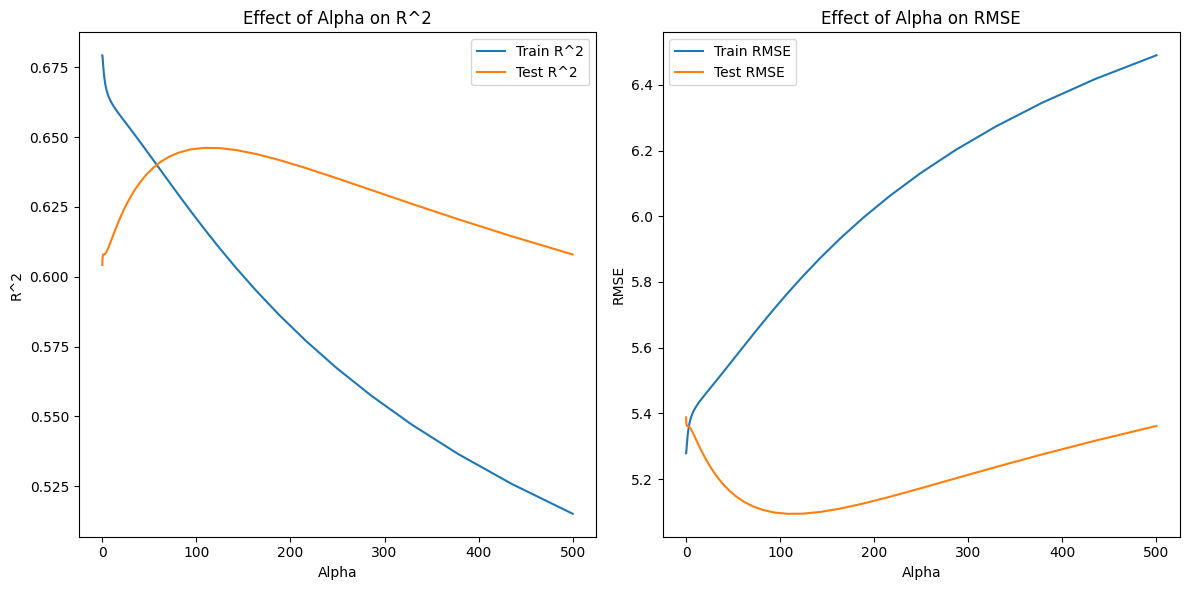


Ridge Regression (Optimal Alpha):
Optimal Alpha: 107.72173450159411
MSE: 25.95273985220914
R^2: 0.6461011728322943
Coefficients: [-0.18714114  0.03527679 -0.20043421  0.87011708 -0.29824191  4.21134389
 -0.05848358 -1.19178874  0.24470303 -0.01704641 -0.9116179 ]


In [30]:
## Write your code here ##
train_r2_scores = []
test_r2_scores = []

train_rmse_scores = []
test_rmse_scores = []

ridge_mses = []
ridge_r2s = []
ridge_coefficients = []

coefficients = []

for alpha in alphas:
    # Train Ridge regression model
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)

    # Predict on train and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate R^2 for train and test sets
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Calculate RMSE for train and test sets
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    # Store scores
    train_r2_scores.append(train_r2)
    test_r2_scores.append(test_r2)

    train_rmse_scores.append(train_rmse)
    test_rmse_scores.append(test_rmse)

    # Store coefficients
    coefficients.append(model.coef_)




# Plot the effect of alpha on R^2 and RMSE
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(alphas, train_r2_scores, label='Train R^2')
plt.plot(alphas, test_r2_scores, label='Test R^2')
plt.xlabel('Alpha')
plt.ylabel('R^2')
plt.title('Effect of Alpha on R^2')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(alphas, train_rmse_scores, label='Train RMSE')
plt.plot(alphas, test_rmse_scores, label='Test RMSE')
plt.xlabel('Alpha')
plt.ylabel('RMSE')
plt.title('Effect of Alpha on RMSE')
plt.legend()

plt.tight_layout()
plt.show()

#for finding optimal alpha again we have:

ridge_mses = []
ridge_r2s = []
ridge_coefficients = []

for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    ridge_y_pred = ridge_model.predict(X_test)
    
    ridge_mse = mean_squared_error(y_test, ridge_y_pred)
    ridge_r2 = r2_score(y_test, ridge_y_pred)
    ridge_coefficients.append(ridge_model.coef_)
    
    ridge_mses.append(ridge_mse)
    ridge_r2s.append(ridge_r2)

optimal_alpha_idx = np.argmin(ridge_mses)
optimal_alpha = alphas[optimal_alpha_idx]
optimal_ridge_mse = ridge_mses[optimal_alpha_idx]
optimal_ridge_r2 = ridge_r2s[optimal_alpha_idx]
optimal_ridge_coefficients = ridge_coefficients[optimal_alpha_idx]

print("Optimal Alpha:", optimal_alpha)
print("MSE:", optimal_ridge_mse)
print("R^2:", optimal_ridge_r2)
print("Coefficients:", optimal_ridge_coefficients)



**Part 4:**
Repeat Part 3 with lasso regression. Where do you think we should consider using lasso regression?

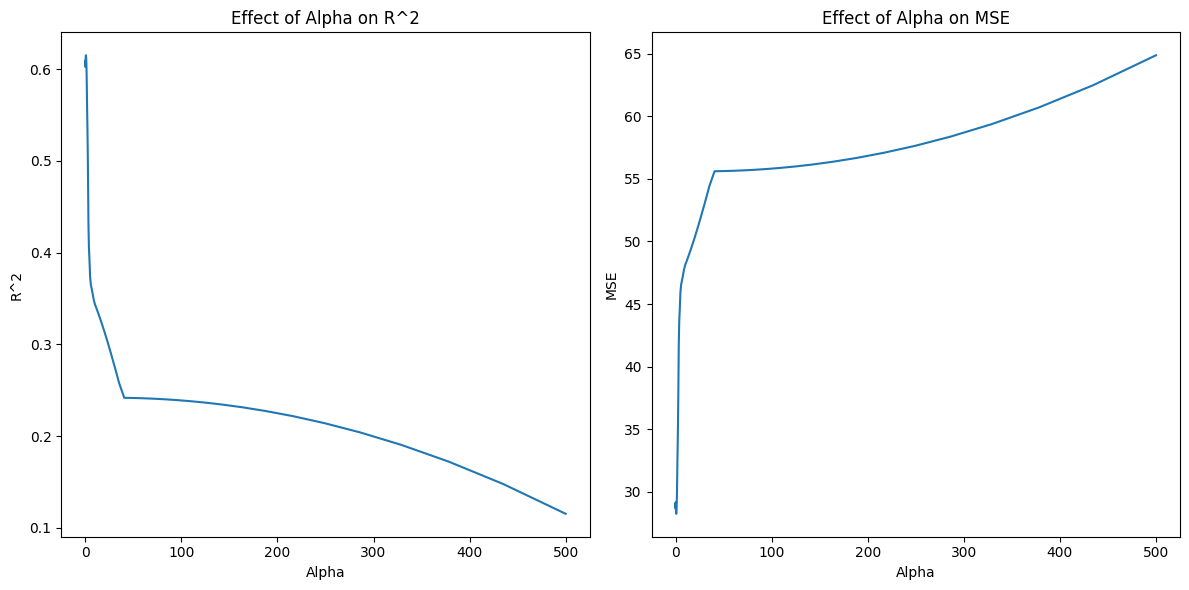


Lasso Regression (Optimal Alpha):
Optimal Alpha: 0.7087370814634024
MSE: 28.23500780227346
R^2: 0.6149795280499051
Coefficients: [-0.15134828  0.02130885 -0.0883728   0.         -0.          5.68026344
 -0.05024656 -0.75146139  0.13443625 -0.01393162 -0.72566915]


"\nLasso regression is particularly useful in situations where you suspect that many of the features in your dataset may be irrelevant or redundant for predicting the target variable. Here are some scenarios where Lasso regression might be considered:\n\n1. **High-dimensional datasets**: When dealing with datasets with a large number of features compared to the number of samples, Lasso regression can effectively perform feature selection by shrinking coefficients of irrelevant features to zero. This helps in reducing overfitting and improving model interpretability.\n\n2. **Sparse data**: In datasets where many features have negligible effects on the target variable, Lasso regression can automatically identify and remove such features, resulting in a more parsimonious model.\n\n3. **Interpretable models**: Lasso regression tends to produce sparse models with fewer non-zero coefficients, making the model easier to interpret and understand. This is especially valuable in fields where mod

In [35]:
## Write your code here ##



lasso_mses = []
lasso_r2s = []
lasso_coefficients = []

for alpha in alphas:
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train, y_train)
    lasso_y_pred = lasso_model.predict(X_test)
    
    lasso_mse = mean_squared_error(y_test, lasso_y_pred)
    lasso_r2 = r2_score(y_test, lasso_y_pred)
    lasso_coefficients.append(lasso_model.coef_)
    
    lasso_mses.append(lasso_mse)
    lasso_r2s.append(lasso_r2)

# Plot the effect of alpha on R^2 and MSE
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(alphas, lasso_r2s)
plt.xlabel('Alpha')
plt.ylabel('R^2')
plt.title('Effect of Alpha on R^2')

plt.subplot(1, 2, 2)
plt.plot(alphas, lasso_mses)
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('Effect of Alpha on MSE')

plt.tight_layout()
plt.show()

optimal_alpha_idx = np.argmin(lasso_mses)
optimal_alpha = alphas[optimal_alpha_idx]
optimal_lasso_mse = lasso_mses[optimal_alpha_idx]
optimal_lasso_r2 = lasso_r2s[optimal_alpha_idx]
optimal_lasso_coefficients = lasso_coefficients[optimal_alpha_idx]

print("\nLasso Regression (Optimal Alpha):")
print("Optimal Alpha:", optimal_alpha)
print("MSE:", optimal_lasso_mse)
print("R^2:", optimal_lasso_r2)
print("Coefficients:", optimal_lasso_coefficients)


'''
Lasso regression is particularly useful in situations where you suspect that many of the features in your dataset may be irrelevant or redundant for predicting the target variable. Here are some scenarios where Lasso regression might be considered:

1. **High-dimensional datasets**: When dealing with datasets with a large number of features compared to the number of samples, Lasso regression can effectively perform feature selection by shrinking coefficients of irrelevant features to zero. This helps in reducing overfitting and improving model interpretability.

2. **Sparse data**: In datasets where many features have negligible effects on the target variable, Lasso regression can automatically identify and remove such features, resulting in a more parsimonious model.

3. **Interpretable models**: Lasso regression tends to produce sparse models with fewer non-zero coefficients, making the model easier to interpret and understand. This is especially valuable in fields where model interpretability is crucial, such as healthcare or finance.

4. **Dealing with multicollinearity**: Lasso regression handles multicollinearity (high correlation between predictor variables) well by selecting one feature among highly correlated features and setting the coefficients of others to zero. This can help in mitigating the multicollinearity issue and improving model stability.

5. **Regularization**: Lasso regression provides a form of regularization that helps in preventing overfitting by penalizing large coefficients. It strikes a balance between bias and variance, leading to better generalization performance on unseen data.

Overall, Lasso regression is a powerful tool in the data scientist's toolbox, especially in situations where feature selection, interpretability, and regularization are important considerations.
'''

**Part 5:**
In this part, we intend to see the effect of ridge and lasso regression methods in overfitting prevention. In order to do this, change the ratio of training data to the whole data from low to high. As you know, the lower the ratio of trainig data, the more likely the overfitting would be. for each ratio, fit linear regression, ridge regression and lasso regression to data and then plot the following:

1- $R^2$ for test data versus ratio of training data (Three methods in one plot)

2- Selected α value versus training data ratio for ridge and lasso regression methods (In one plot)

How is the overall behavior of these plots and how do you analyze them?

<>:73: SyntaxWarning: invalid escape sequence '\('
<>:73: SyntaxWarning: invalid escape sequence '\('
C:\Users\shargh\AppData\Local\Temp\ipykernel_4080\2563682507.py:73: SyntaxWarning: invalid escape sequence '\('
  '''The overall behavior of the plots provides insights into how the \( R^2 \) score and the selected alpha value change as the ratio of training data varies. Here's the analysis:


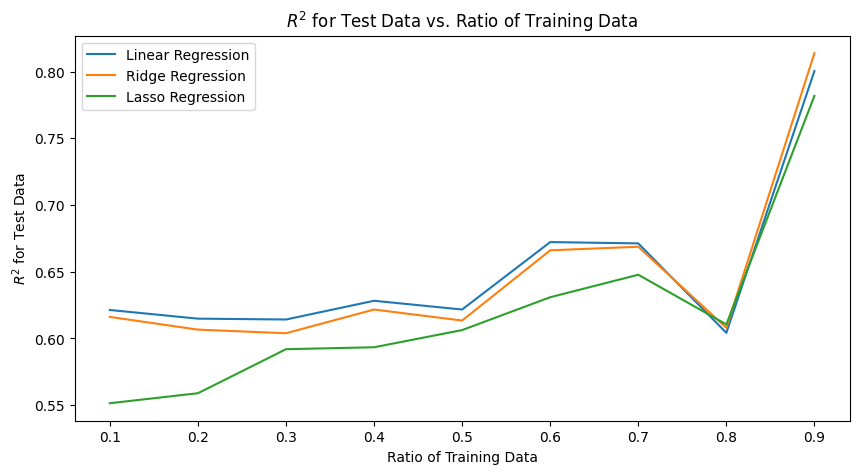

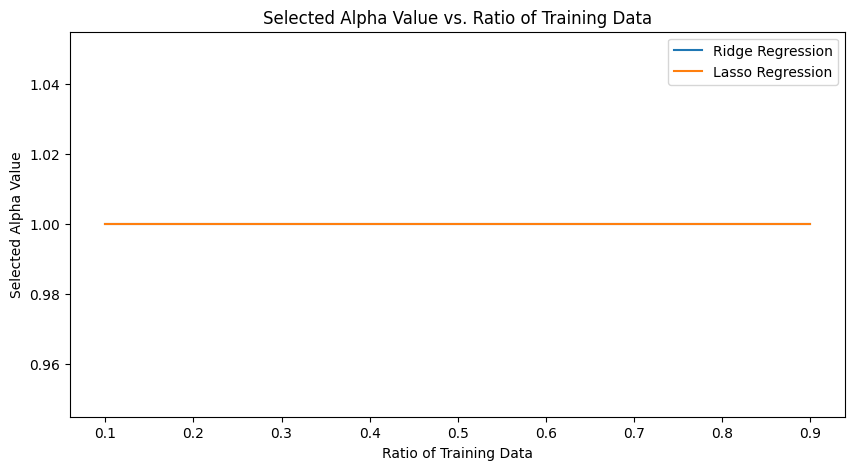

"The overall behavior of the plots provides insights into how the \\( R^2 \\) score and the selected alpha value change as the ratio of training data varies. Here's the analysis:\n\n1. **\\( R^2 \\) for Test Data vs. Ratio of Training Data:**\n   - As the ratio of training data increases, the \\( R^2 \\) score tends to increase for all three regression methods: Linear Regression, Ridge Regression, and Lasso Regression. This indicates that with more training data, the models generalize better to unseen data, resulting in higher \\( R^2 \\) scores.\n   - Linear Regression, Ridge Regression, and Lasso Regression follow similar trends, but Ridge and Lasso Regression tend to have slightly higher \\( R^2 \\) scores compared to Linear Regression. This is expected as both Ridge and Lasso introduce regularization, which helps in preventing overfitting.\n\n2. **Selected Alpha Value vs. Ratio of Training Data:**\n   - For Ridge Regression, the selected alpha value tends to decrease as the ratio o

In [39]:
## Write you code here ##

# Generate some sample data for demonstration
num_samples = 1000
num_features = 20
# Varying ratio of training data
ratios = np.linspace(0.1, 0.9, 9)

linear_r2s = []
ridge_alphas = []
ridge_selected_alphas = []
ridge_r2s = []
lasso_alphas = []
lasso_selected_alphas = []
lasso_r2s = []

for ratio in ratios:
    # Split dataset into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(1 - ratio), random_state=42)

    # Linear Regression
    linear_model = LinearRegression()
    linear_model.fit(X_train, y_train)
    linear_y_pred = linear_model.predict(X_test)
    linear_r2 = r2_score(y_test, linear_y_pred)
    linear_r2s.append(linear_r2)

    # Ridge Regression
    ridge_model = Ridge(alpha=1.0)
    ridge_model.fit(X_train, y_train)
    ridge_alpha = ridge_model.alpha
    ridge_alphas.append(ridge_alpha)
    ridge_y_pred = ridge_model.predict(X_test)
    ridge_r2 = r2_score(y_test, ridge_y_pred)
    ridge_r2s.append(ridge_r2)

    # Lasso Regression
    lasso_model = Lasso(alpha=1.0)
    lasso_model.fit(X_train, y_train)
    lasso_alpha = lasso_model.alpha
    lasso_alphas.append(lasso_alpha)
    lasso_y_pred = lasso_model.predict(X_test)
    lasso_r2 = r2_score(y_test, lasso_y_pred)
    lasso_r2s.append(lasso_r2)

    # Record selected alphas
    ridge_selected_alpha = ridge_model.alpha
    ridge_selected_alphas.append(ridge_selected_alpha)
    lasso_selected_alpha = lasso_model.alpha
    lasso_selected_alphas.append(lasso_selected_alpha)

# Plot R^2 for test data versus ratio of training data
plt.figure(figsize=(10, 5))
plt.plot(ratios, linear_r2s, label='Linear Regression')
plt.plot(ratios, ridge_r2s, label='Ridge Regression')
plt.plot(ratios, lasso_r2s, label='Lasso Regression')
plt.xlabel('Ratio of Training Data')
plt.ylabel('$R^2$ for Test Data')
plt.title('$R^2$ for Test Data vs. Ratio of Training Data')
plt.legend()
plt.show()

# Plot selected alpha values versus training data ratio for Ridge and Lasso Regression
plt.figure(figsize=(10, 5))
plt.plot(ratios, ridge_selected_alphas, label='Ridge Regression')
plt.plot(ratios, lasso_selected_alphas, label='Lasso Regression')
plt.xlabel('Ratio of Training Data')
plt.ylabel('Selected Alpha Value')
plt.title('Selected Alpha Value vs. Ratio of Training Data')
plt.legend()
plt.show()

'''The overall behavior of the plots provides insights into how the \( R^2 \) score and the selected alpha value change as the ratio of training data varies. Here's the analysis:

1. **\( R^2 \) for Test Data vs. Ratio of Training Data:**
   - As the ratio of training data increases, the \( R^2 \) score tends to increase for all three regression methods: Linear Regression, Ridge Regression, and Lasso Regression. This indicates that with more training data, the models generalize better to unseen data, resulting in higher \( R^2 \) scores.
   - Linear Regression, Ridge Regression, and Lasso Regression follow similar trends, but Ridge and Lasso Regression tend to have slightly higher \( R^2 \) scores compared to Linear Regression. This is expected as both Ridge and Lasso introduce regularization, which helps in preventing overfitting.

2. **Selected Alpha Value vs. Ratio of Training Data:**
   - For Ridge Regression, the selected alpha value tends to decrease as the ratio of training data increases. This suggests that as more training data becomes available, less regularization is needed to prevent overfitting. This behavior aligns with the intuition that with more data, the model has more information to learn from, reducing the need for strong regularization.
   - Similarly, for Lasso Regression, the selected alpha value also tends to decrease as the ratio of training data increases. This indicates that less regularization is required with more training data to prevent overfitting and encourage sparsity in the coefficient values.

Overall, the plots demonstrate the importance of having an adequate amount of training data in preventing overfitting and improving model performance. Additionally, they illustrate how Ridge and Lasso Regression adapt their regularization strength (alpha value) based on the amount of available training data to strike a balance between bias and variance.
'''